Какие жанры самые популярные по глобальным продажам?

Какая платформа была лидером продаж по годам?

Есть ли связь между оценками критиков и продажами игр?

Как распределяются игры по возрастным рейтингам?

In [110]:
# Import EDA Statements

import pandas as pd
import seaborn as sns
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_theme()

In [111]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
df['User_Score'].replace('tbd', None, inplace=True)
df['User_Score'].astype('float64')
df['Year_of_Release'].astype('Int64')
df.dropna(subset=['Name'], inplace=True)

df = df[df['Year_of_Release'] <= 2016]  # Empty data

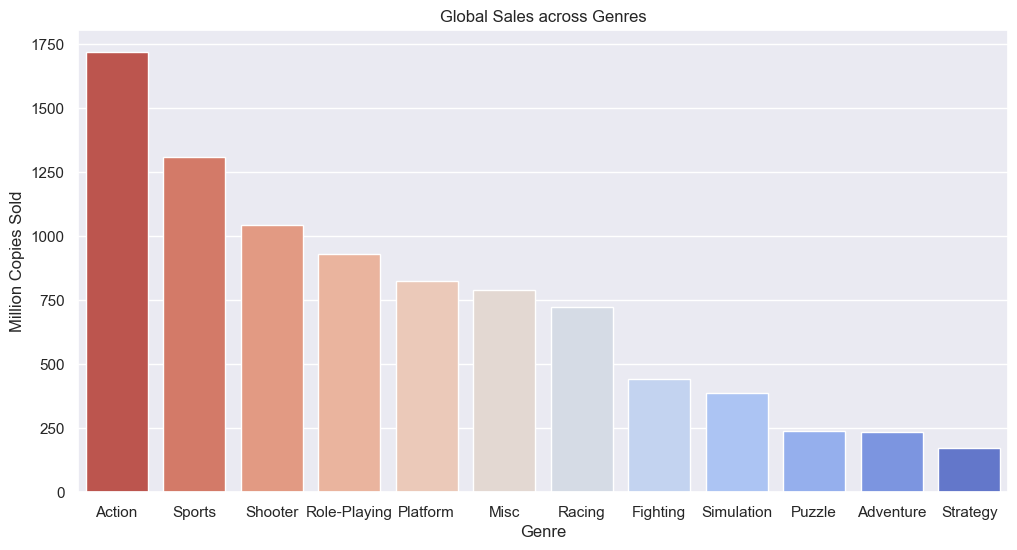

In [113]:
Sales_df = df.groupby('Genre')[['Global_Sales']].sum()
Sales_df = Sales_df.sort_values(by='Global_Sales', ascending=False)

plt.figure(figsize=(12, 6))
plt.title('Global Sales across Genres')
plt.ylabel('Million Copies Sold')
sns.barplot(data= Sales_df, x='Genre' , y= 'Global_Sales', palette="coolwarm_r")
plt.show()

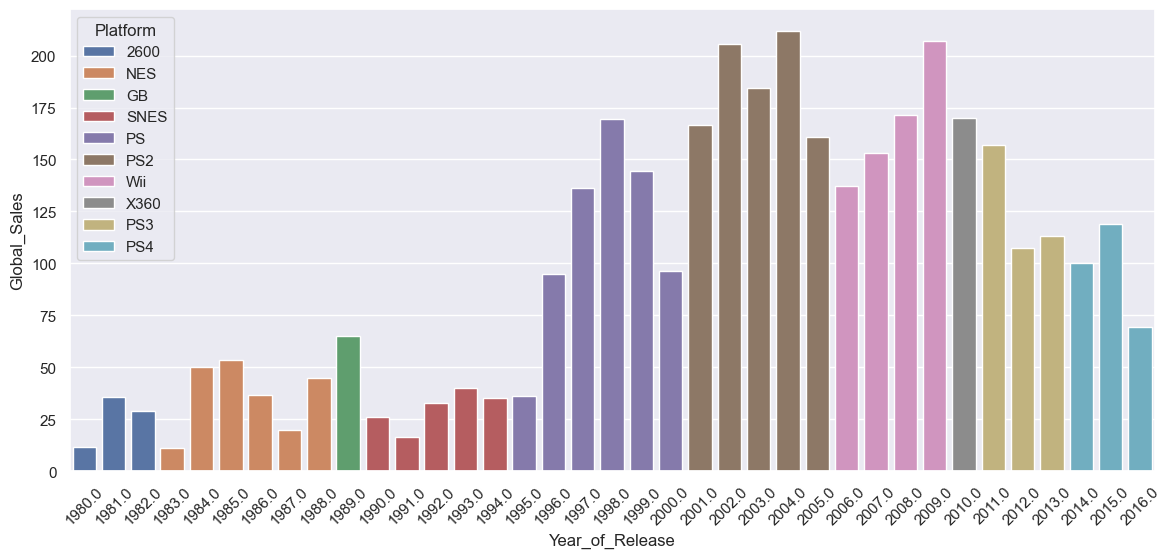

In [114]:
Plat_df = df.groupby(['Year_of_Release', 'Platform'])['Global_Sales'].sum().reset_index()
leaders = Plat_df.loc[Plat_df.groupby('Year_of_Release')['Global_Sales'].idxmax()]

plt.figure(figsize=(14, 6))
sns.barplot(data=leaders, x='Year_of_Release', y='Global_Sales', hue='Platform')
plt.xticks(rotation=45)
plt.show()

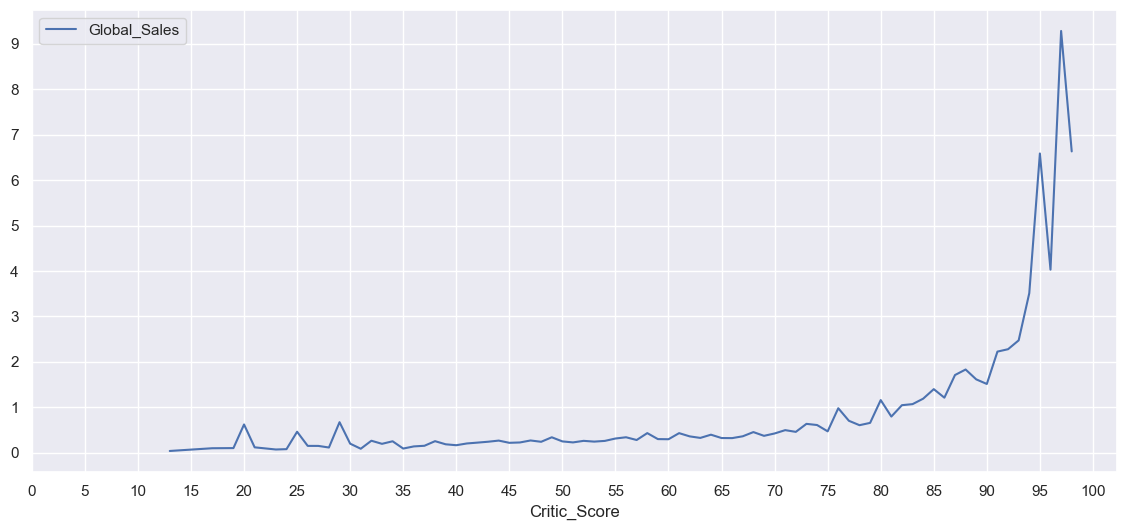

In [115]:
Critic_df = df.groupby('Critic_Score')[['Global_Sales']].mean()

plt.figure(figsize=(14, 6))
sns.lineplot(Critic_df)
plt.xticks(range(0, 101, 5))
plt.yticks(range(0, int(Critic_df['Global_Sales'].max())+1, 1))
plt.show()

In [116]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


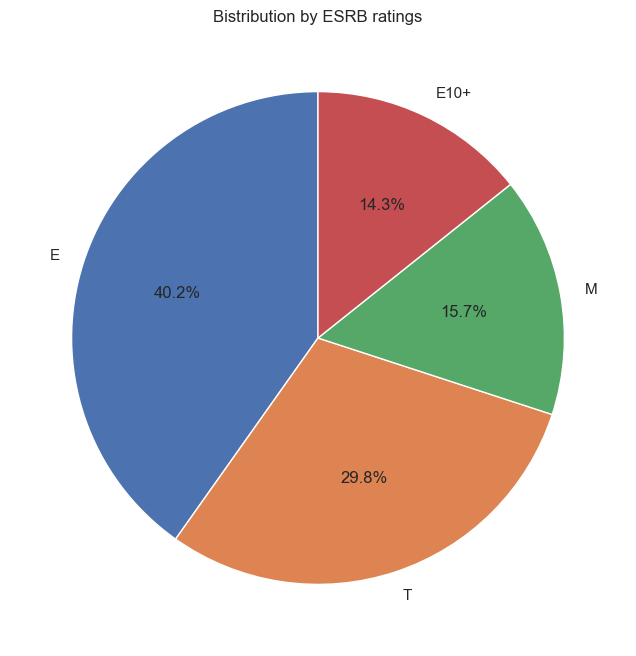

In [123]:
filtered_df = df[df["Rating"].isin(["E", "T", "M", "E10+"])]
filtered_df["Rating"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", figsize=(8,8), startangle=90)
plt.title("Вistribution by ESRB ratings")
plt.ylabel(None)
plt.show()
